# Machine Learning - Assignment 2

Arne Huckemann (ahuckema), Elise Wolf (eliwolf)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

# Load the data

In [4]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

In [5]:
# Variables containing specific types of features
word_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('word_freq')]
word_freq_features = features[word_freq_indices]
char_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('char_freq')]
char_freq_features = features[char_freq_indices]
capital_run_indices = [i for i, feature in enumerate(features) if feature.startswith('capital_run')]
capital_run_features = features[capital_run_indices]

print(f"Number of Word Frequency Features: {len(word_freq_features)}")
print(f"Number of Character Frequency Features: {len(char_freq_features)}")
print(f"Number of Capital Run Length Features: {len(capital_run_features)}\n")

print("Word Frequency Features:")
print(word_freq_features)
print("\nCharacter Frequency Features:")
print(char_freq_features)
print("\nCapital Run Length Features:")
print(capital_run_features)

Number of Word Frequency Features: 48
Number of Character Frequency Features: 6
Number of Capital Run Length Features: 3

Word Frequency Features:
['word_freq_make' 'word_freq_address' 'word_freq_all' 'word_freq_3d'
 'word_freq_our' 'word_freq_over' 'word_freq_remove' 'word_freq_internet'
 'word_freq_order' 'word_freq_mail' 'word_freq_receive' 'word_freq_will'
 'word_freq_people' 'word_freq_report' 'word_freq_addresses'
 'word_freq_free' 'word_freq_business' 'word_freq_email' 'word_freq_you'
 'word_freq_credit' 'word_freq_your' 'word_freq_font' 'word_freq_000'
 'word_freq_money' 'word_freq_hp' 'word_freq_hpl' 'word_freq_george'
 'word_freq_650' 'word_freq_lab' 'word_freq_labs' 'word_freq_telnet'
 'word_freq_857' 'word_freq_data' 'word_freq_415' 'word_freq_85'
 'word_freq_technology' 'word_freq_1999' 'word_freq_parts' 'word_freq_pm'
 'word_freq_direct' 'word_freq_cs' 'word_freq_meeting'
 'word_freq_original' 'word_freq_project' 'word_freq_re' 'word_freq_edu'
 'word_freq_table' 'word_fre

# 1. Dataset Statistics

## 1 a) Look at the kernel density plot (code provided) of all features and discuss what you see (or don’t see).

In [6]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

### Analysis of the `describe` Function Output

The `describe` function from `scipy.stats` provides the following statistics for each feature:

1. **Number of Observations (`nobs`)**: 3065
   - This indicates that there are 3065 emails in the dataset.

2. **Minimum and Maximum Values (`minmax`)**: The range of values for each feature.
   - The minimum values for all features are 0, indicating that some emails do not contain the corresponding word, character, or capital run length.
   - The maximum values vary significantly across features, indicating the highest observed frequency or value for each feature.

3. **Mean**:
   - The mean values for word frequency features are generally low, indicating that most words do not appear frequently in the emails.
   - The mean values for character frequency features are also low, suggesting that specific characters do not appear frequently.
   - The mean values for capital run length features are higher, indicating that sequences of capital letters are more common.

4. **Variance**:
   - The variance values indicate the spread of the data. Higher variance values suggest more variability in the feature values.
   - Word frequency features have varying degrees of variance, with some features showing high variability.
   - Character frequency features generally have varying variance.
   - Capital run length features have high variance, indicating significant variability in the lengths of capital letter sequences.

5. **Skewness**: The asymmetry of the distribution of each feature.
   - Positive skewness values indicate that the distributions are right-skewed, meaning that there are more low values and a few high values.
   - Word frequency features show high skewness, suggesting that most words appear infrequently, with a few words appearing very frequently.
   - Character frequency features also show high skewness.
   - Capital run length features have lower skewness compared to word and character frequency features.

6. **Kurtosis**: The "tailedness" of the distribution of each feature.
   - High kurtosis values indicate that the distributions have heavy tails, meaning that there are more outliers.
   - Word frequency features have high kurtosis, suggesting the presence of outliers.
   - Character frequency features also show high kurtosis.
   - Capital run length features have extremely high kurtosis, indicating a significant number of outliers.

The summary statistics indicate that the distributions of these features are generally right-skewed with heavy tails, suggesting the presence of outliers and infrequent high values. This analysis provides insights into the variability and distribution of the features in the spam mail dataset.

In [7]:
# Get the summary statistics for the y variable
summary_stats = scipy.stats.describe(y)

# Print the summary statistics in a readable format
print(f"Number of observations: {summary_stats.nobs}")
print(f"Minimum value: {summary_stats.minmax[0]}")
print(f"Maximum value: {summary_stats.minmax[1]}")
print(f"Mean: {summary_stats.mean}")
print(f"Variance: {summary_stats.variance}")
print(f"Skewness: {summary_stats.skewness}")
print(f"Kurtosis: {summary_stats.kurtosis}")

Number of observations: 3065
Minimum value: 0
Maximum value: 1
Mean: 0.39738988580750406
Variance: 0.23954932085067235
Skewness: 0.41936632478193103
Kurtosis: -1.824131885638896


### Analysis of the Output for the `y` Variable (Spam Classification)

The `y` variable represents the classification of emails into spam (1) or non-spam (0). 

1. **Number of Observations (`nobs`)**: 3065
   - This indicates that there are 3065 emails in the dataset.

2. **Minimum Value**: 0
   - The minimum value is 0, indicating that there are emails classified as non-spam.

3. **Maximum Value**: 1
   - The maximum value is 1, indicating that there are emails classified as spam.

4. **Mean**: 0.39738988580750406
   - The mean value suggests that around 39.7% of the emails in the dataset are classified as spam.

5. **Variance**: 0.23954932085067235
   - The variance value is approximately 0.24. This indicates the variability in the classification of emails. Since the classification is binary, the variance is relatively low.

6. **Skewness**: 0.41936632478193103
   - The skewness value is 0.42. This positive skewness indicates that the distribution of the `y` variable is slightly right-skewed, meaning there are slightly more non-spam emails than spam emails.

7. **Kurtosis**: -1.824131885638896
   - The kurtosis value is negative and indicates that the distribution of the `y` variable is platykurtic, meaning it has lighter tails and a flatter peak compared to a normal distribution.

Overall, the dataset has a reasonable balance between spam and non-spam emails, with a slight skew towards non-spam emails.

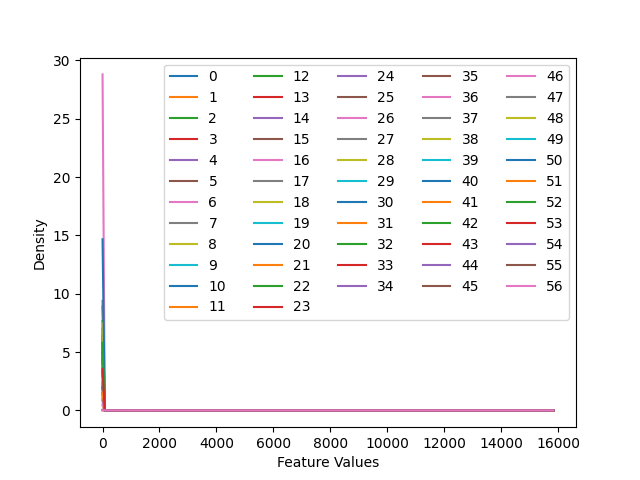

In [8]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)] # compute the gaussian kernel density estimate for every feature in the dataset
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5)
plt.show()

### Analysis of the Kernel Density Plot for All Features

Based on the provided description of the kernel density plot for all features, we observe the following:

#### What We See

1. **High Density at 0**:
   - **Observation**: The density for all features is highest at 0 on the x-axis (feature values).
   - **Implication**: This indicates that the majority of the feature values are concentrated around 0. In other words, the majority of the features have low or zero values in the dataset. Most features have low or zero values in the dataset, suggesting that many words, characters, or capital run lengths are either absent or occur very infrequently in the emails.

2. **Highest Density Feature**:
   - **Observation**: One feature reaches a maximum density of 28.8, which is significantly higher than the others.
   - **Implication**: This feature is very common and frequently has low values close to 0. It might be an indicator in distinguishing between spam and non-spam emails.

3. **Second Highest Density Feature**:
   - **Observation**: Another feature has a density peak of 14.7.
   - **Implication**: This feature is also relatively common but not as prevalent as the first one. It still plays a significant role in the dataset.

4. **Remaining Features**:
   - **Observation**: The remaining features have densities ranging between 0 and 9.5, with most peaking between 2 and 6.
   - **Implication**: These features are less common compared to the top two but still have a notable presence. They contribute to the overall feature set but are not as dominant.

5. **Rapid Decline in Density**:
   - **Observation**: All the density curves decline rapidly after their initial peaks.
   - **Implication**: Higher feature values are rare. Most of the data points are concentrated around lower values, indicating that extreme values are uncommon.

6. **Convergence at Feature Value 80**:
   - **Observation**: All the density curves converge to a density of 0 at a feature value of 80.
   - **Implication**: Feature values above 80 are extremely rare or non-existent in the dataset. This suggests a natural upper bound for the feature values.

#### What We Don't See

1. **Distinct Peaks for All Features**:
   - **Observation**: Only a few features have distinct high peaks, while the rest have lower densities.
   - **Implication**: Not all features are equally important or prevalent. Some features might be redundant or less informative for the classification task.

2. **Uniform Distribution**:
   - **Observation**: The density curves are not uniformly distributed across the feature values.
   - **Implication**: The dataset is not evenly spread out. There are clear concentrations of values around 0, with a rapid drop-off, indicating skewness and sparsity.

3. **High Feature Values**:
   - **Observation**: There are no high-density values beyond a feature value of 80.
   - **Implication**: The dataset lacks high feature values, which might be expected in certain contexts. This absence suggests that the features are generally low in magnitude.

4. **Overlap of Density Curves**:
   - **Observation**: The density curves do overlap at higher feature values, specifically at a feature value of 80 where they all converge to a density of 0.
   - **Implication**: At higher feature values, the features are indistinguishable as they all have a density of 0. This convergence indicates that high feature values are rare across all features.

The kernel density plot reveals a dataset dominated by low feature values, with a few features being more prevalent than others. The rapid decline in density and convergence at higher feature values indicate sparsity and skewness. The absence of high feature values and uniform distribution suggests that the dataset is concentrated around lower values, with clear distinctions between certain features. These insights can guide further analysis and preprocessing steps, such as feature selection, normalization, and handling of outliers.

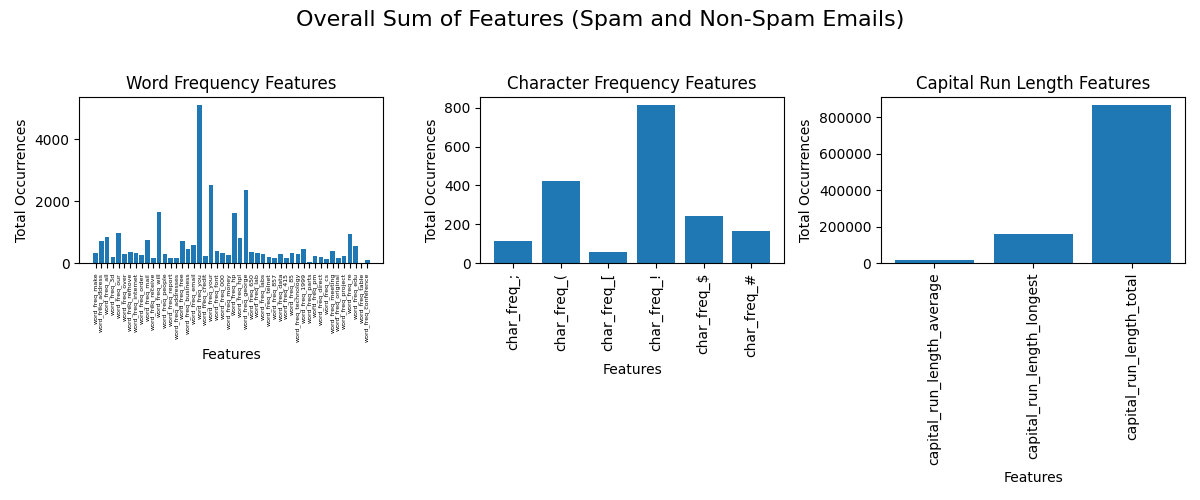

In [9]:
# Sum the occurrences for each feature
word_freq_sums = np.sum(X[:, word_freq_indices], axis=0)
char_freq_sums = np.sum(X[:, char_freq_indices], axis=0)
capital_run_sums = np.sum(X[:, capital_run_indices], axis=0)

# Plotting the bar plots
plt.figure(figsize=(12, 5))

# Word Frequency Features
plt.subplot(1, 3, 1)
plt.bar(word_freq_features, word_freq_sums)
plt.xticks(rotation=90, fontsize=4.5)
plt.title('Word Frequency Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features
plt.subplot(1, 3, 2)
plt.bar(char_freq_features, char_freq_sums)
plt.xticks(rotation=90)
plt.title('Character Frequency Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features
plt.subplot(1, 3, 3)
plt.bar(capital_run_features, capital_run_sums)
plt.xticks(rotation=90)
plt.title('Capital Run Length Features')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Overall title
plt.suptitle('Overall Sum of Features (Spam and Non-Spam Emails)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


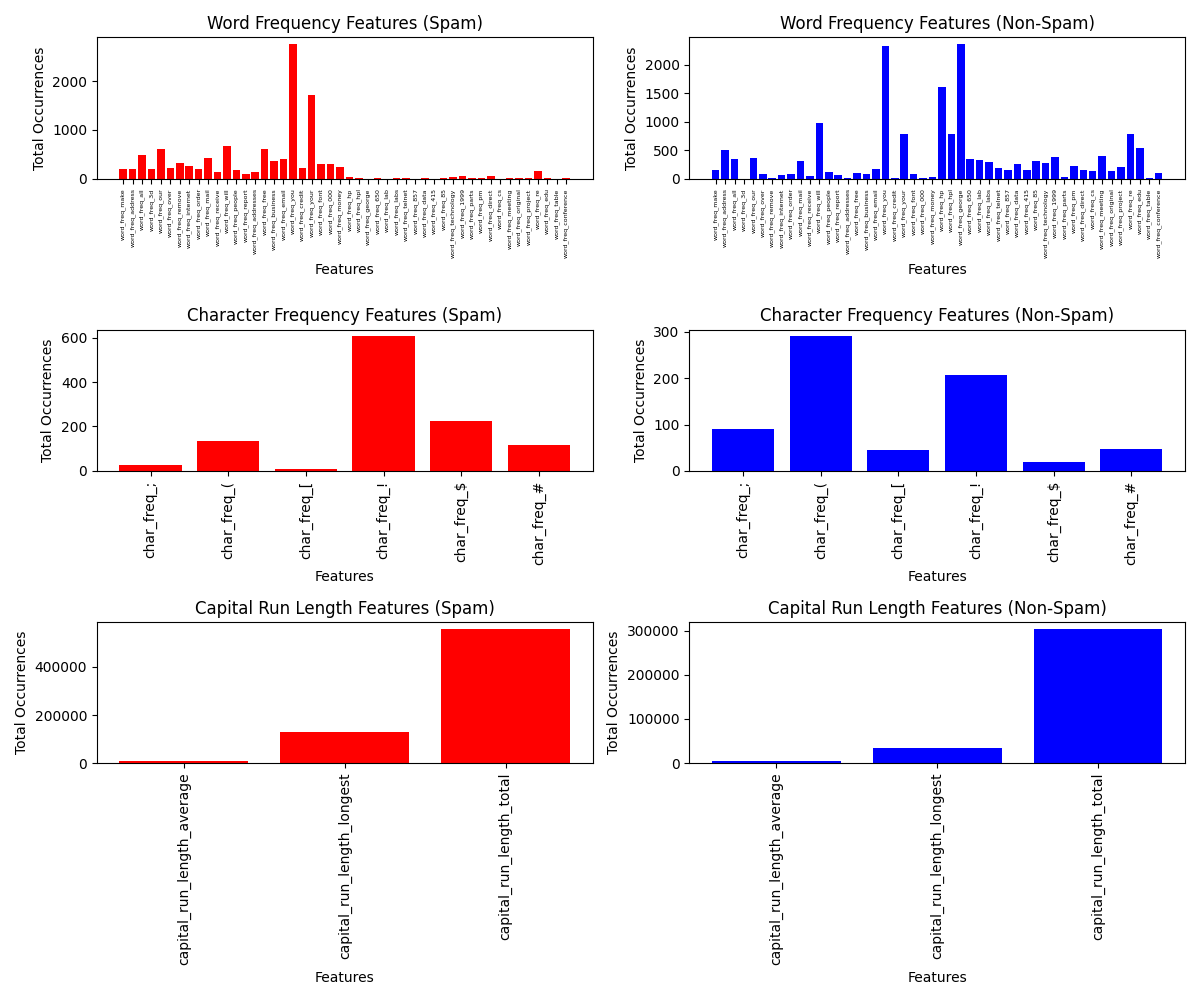

In [10]:
# Assuming X is your dataset and features is the array of feature names

# Variables containing specific types of features
word_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('word_freq')]
word_freq_features = features[word_freq_indices]
char_freq_indices = [i for i, feature in enumerate(features) if feature.startswith('char_freq')]
char_freq_features = features[char_freq_indices]
capital_run_indices = [i for i, feature in enumerate(features) if feature.startswith('capital_run')]
capital_run_features = features[capital_run_indices]

# Split the dataset into spam and non-spam
X_spam = X[y == 1]
X_non_spam = X[y == 0]

# Sum the occurrences for each feature for spam and non-spam
word_freq_sums_spam = np.sum(X_spam[:, word_freq_indices], axis=0)
word_freq_sums_non_spam = np.sum(X_non_spam[:, word_freq_indices], axis=0)
char_freq_sums_spam = np.sum(X_spam[:, char_freq_indices], axis=0)
char_freq_sums_non_spam = np.sum(X_non_spam[:, char_freq_indices], axis=0)
capital_run_sums_spam = np.sum(X_spam[:, capital_run_indices], axis=0)
capital_run_sums_non_spam = np.sum(X_non_spam[:, capital_run_indices], axis=0)

# Plotting the bar plots
plt.figure(figsize=(12, 10))

# Word Frequency Features - Spam
plt.subplot(3, 2, 1)
plt.bar(word_freq_features, word_freq_sums_spam, color='red')
plt.xticks(rotation=90, fontsize=4.5)
plt.title('Word Frequency Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Word Frequency Features - Non-Spam
plt.subplot(3, 2, 2)
plt.bar(word_freq_features, word_freq_sums_non_spam, color='blue')
plt.xticks(rotation=90, fontsize=4.5)
plt.title('Word Frequency Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features - Spam
plt.subplot(3, 2, 3)
plt.bar(char_freq_features, char_freq_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Character Frequency Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Character Frequency Features - Non-Spam
plt.subplot(3, 2, 4)
plt.bar(char_freq_features, char_freq_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Character Frequency Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features - Spam
plt.subplot(3, 2, 5)
plt.bar(capital_run_features, capital_run_sums_spam, color='red')
plt.xticks(rotation=90)
plt.title('Capital Run Length Features (Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

# Capital Run Length Features - Non-Spam
plt.subplot(3, 2, 6)
plt.bar(capital_run_features, capital_run_sums_non_spam, color='blue')
plt.xticks(rotation=90)
plt.title('Capital Run Length Features (Non-Spam)')
plt.xlabel('Features')
plt.ylabel('Total Occurrences')

plt.tight_layout()
plt.show()

### Visible Connections Between the Kernel Density Plot and the Bar Plot Figure

#### Kernel Density Plot

The kernel density plot provides a smooth, continuous estimate of the probability density function (PDF) for each feature. It shows how the values of each feature are distributed across the dataset, highlighting the concentration of values around certain points (e.g., 0) and the overall shape of the distribution.

#### Bar Plot Figure

The bar plot figure, on the other hand, shows the total occurrences of each feature for spam and non-spam emails. It provides a discrete count of how often each feature appears in the dataset, separated by the classification labels (spam and non-spam).

#### Connections

1. **Feature Prevalence**:
   - **Kernel Density Plot**: Features with high density peaks indicate that these features have values concentrated around certain points, often around 0.
   - **Bar Plot Figure**: The bar plots show the total occurrences of these features, confirming their prevalence in the dataset. For example, features with high density peaks in the kernel density plot will likely have higher bars in the bar plot, indicating their frequent occurrence.

2. **Distribution Shape**:
   - **Kernel Density Plot**: The rapid decline in density after the initial peak shows that higher feature values are rare.
   - **Bar Plot Figure**: The bar plots reflect this by showing that most features have low total occurrences, with only a few features having higher counts. This aligns with the observation that higher feature values are uncommon.

3. **Comparison Between Spam and Non-Spam**:
   - **Kernel Density Plot**: While the kernel density plot does not directly separate spam and non-spam emails, it provides an overall view of the feature distributions.
   - **Bar Plot Figure**: The bar plots explicitly separate the total occurrences of features for spam and non-spam emails. This allows for a direct comparison of how features differ between the two classes, which can be inferred from the density plot but is more clearly visualized in the bar plots.

While there are some visible connections between the kernel density plot and the bar plot figure, such as feature prevalence and distribution shape, they represent different aspects of the data. The kernel density plot provides a smooth estimate of the feature distributions, while the bar plot shows discrete counts of feature occurrences for spam and non-spam emails. Together, they provide complementary insights into the dataset.

## 1 b) Normalize the data using z-scores, i.e., normalize each feature to mean 0 and variance 1.
Normalize both training and test data. In particular, think about how test data should be
normalized.
Make sure to stick to the variable names provided in the code fragements. From now on, we
will exclusively work with the normalized data

In [11]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
Xz = (X - X_mean) / X_std

Xtest_mean = np.mean(Xtest, axis=0)
Xtest_std = np.std(Xtest, axis=0)
Xtestz = (Xtest - Xtest_mean) / Xtest_std


### Normalizing Test Data Using Z-Scores

When normalizing data using z-scores, the goal is to transform each feature to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing by the standard deviation for each feature. However, it's crucial to handle the test data normalization correctly to avoid data leakage and ensure that the model generalizes well.

1. **Used Training Data Statistics**:
   - **Why**: The test data should be normalized using the mean and standard deviation calculated from the training data, not from the test data itself.
   - **Reason**: This ensures that the test data is transformed in the same way as the training data, maintaining consistency. Using test data statistics would introduce information from the test set into the training process, leading to data leakage and potentially overestimating the model's performance.

2. **Consistency**:
   - **Why**: Consistency in normalization ensures that the model sees data in the same scale during both training and testing.
   - **Reason**: If the test data were normalized using its own statistics, the scale might differ from the training data, leading to poor model performance.

In [12]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0
np.var(Xz, axis=0)  # should be all 1
np.mean(Xtestz, axis=0)  # what do you get here?
np.var(Xtestz, axis=0)

# Check if the means of Xz are all close to 0
assert np.allclose(np.mean(Xz, axis=0), 0, atol=1e-7), "Means of Xz are not close to 0"

# Check if the variances of Xz are all close to 1
assert np.allclose(np.var(Xz, axis=0), 1, atol=1e-7), "Variances of Xz are not close to 1"

# Check if the means of Xtestz are all close to 0
assert np.allclose(np.mean(Xtestz, axis=0), 0, atol=1e-7), "Means of Xtestz are not close to 0"

# Check if the variances of Xtestz are all close to 1
assert np.allclose(np.var(Xtestz, axis=0), 1, atol=1e-7), "Variances of Xtestz are not close to 1"

np.sum(Xz ** 3)  # should be: 1925261.15

np.float64(1925261.1560010156)

In [13]:
# Explore the normalized data

# Describe the normalized data
Xz_description = scipy.stats.describe(Xz)
print("Normalized Data Description:")
print(f"Number of observations: {Xz_description.nobs}")
print(f"Minimum values: {Xz_description.minmax[0]}")
print(f"Maximum values: {Xz_description.minmax[1]}")
print(f"Mean: {Xz_description.mean}")
print(f"Variance: {Xz_description.variance}")
print(f"Skewness: {Xz_description.skewness}")
print(f"Kurtosis: {Xz_description.kurtosis}")

Normalized Data Description:
Number of observations: 3065
Minimum values: [-0.33868966 -0.16633988 -0.56645068 -0.04718354 -0.47898424 -0.36748274
 -0.30368405 -0.25856417 -0.33681628 -0.35271648 -0.3071498  -0.61691561
 -0.30404022 -0.17281876 -0.19167443 -0.35919365 -0.32867465 -0.34479063
 -0.93026218 -0.18752916 -0.6823584  -0.12183419 -0.29482337 -0.23489648
 -0.33798096 -0.30510712 -0.22861824 -0.23789657 -0.16670253 -0.22752017
 -0.17793276 -0.14962957 -0.17074314 -0.15113669 -0.18405744 -0.24239371
 -0.33247573 -0.05960626 -0.20026358 -0.19322923 -0.11951478 -0.16927521
 -0.20397257 -0.12600952 -0.30371488 -0.19888906 -0.07770109 -0.11456523
 -0.16118965 -0.49626623 -0.14946504 -0.30472969 -0.30471542 -0.10290339
 -0.1431899  -0.23430286 -0.46302747]
Maximum values: [13.53665752 10.22962369  9.97107705 32.0309348  13.2218722  13.33320371
 19.14018444 26.5342849  12.27627668 26.17550318 10.26044445 10.48322465
 17.91411535 19.139865   10.61624311 15.14813176 15.61411495 16.45125

### Analysis of the Normalized Data Using Z-Scores

1. **Mean and Variance**: 
  - **Mean**: Close to 0 for all features (e.g., 1.85459768e-17). The mean of each feature is close to 0, as expected after normalization.
  - **Variance**: Close to 1 for all features (e.g., 1.00032637). The variance of each feature is close to 1, as expected after normalization.

The normalization process has successfully transformed the data to have a mean of 0 and a variance of 1 for each feature, standardizing the scale of the data.

2. **Minimum and Maximum Values**:
  - **Minimum Values**: Ranges from approximately -0.34 to -0.05. The minimum values are now closer to 0 but can be negative due to the normalization process.
  - **Maximum Values**: Ranges from approximately 9.57 to 45.05. The maximum values are now scaled according to the standard deviation of the original data.

The normalization process has adjusted the range of feature values, scaling them based on the original mean and standard deviation. This ensures that all features are on a comparable scale.

3. **Skewness and Kurtosis**:
  - **Skewness**: The skewness values remain the same as in the unnormalized data.
  - **Kurtosis**: The kurtosis values also remain the same as in the unnormalized data.

Normalization does not affect the skewness and kurtosis of the data. These statistics remain the same because normalization is a linear transformation that does not change the shape of the distribution.

The normalization process using z-scores has successfully standardized the data, transforming each feature to have a mean of 0 and a variance of 1. This makes the features comparable in scale, which is crucial for many machine learning algorithms. The skewness and kurtosis values remain unchanged, indicating that the underlying distribution shapes of the features are preserved. This ensures that the normalized data retains the same characteristics as the unnormalized data, but on a standardized scale.

## 1 c) Redo the kernel density plot on the normalized data. What changed? Is there anything that “sticks out”?

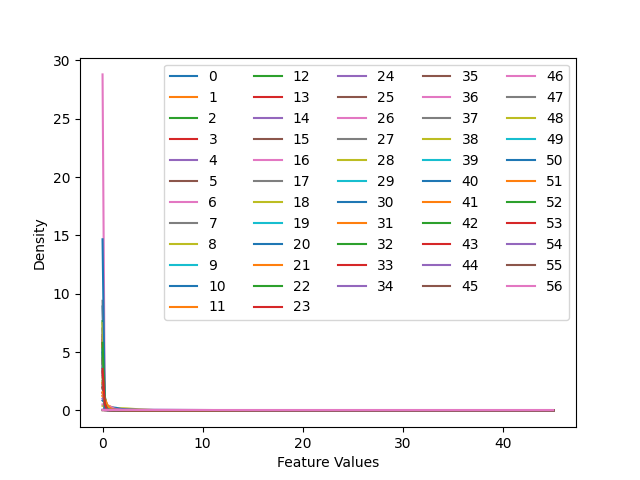

In [14]:
# plot the distribution of the normalized data, should look the same
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)] # compute the gaussian kernel density estimate for every feature in the dataset
xs = np.linspace(0, np.max(Xz), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.legend(ncol=5)
plt.show()

### Analysis of the Kernel Density Plot for Normalized Data

The kernel density plot for the normalized data shows some distinct characteristics compared to the unnormalized data:

1. **Increased Overlap**: The density curves for different features overlap more significantly. This is because the normalization process has standardized the scale of all features, bringing them to a common range.

2. **Different Tails**: The density curves do not all converge to zero at the same feature value. Instead, they have different tails, reflecting the standardized but varied spread of the features.

3. **Standardized Scale**: The x-axis (feature values) is now standardized. This standardization makes the features directly comparable.

4. **Shape of Distribution**: The overall shape of the density curves remains the same as in the unnormalized data. The peaks, modes, and general distribution patterns are preserved.

The kernel density plot for the normalized data shows increased overlap of the density curves and different tails, reflecting the standardized scale of the features. The normalization process has brought all features to a common range, making them directly comparable. However, the underlying distribution shapes remain unchanged, preserving the original patterns and peaks observed in the unnormalized data. This consistency confirms that the normalization process has effectively standardized the data while maintaining its inherent distribution characteristics.

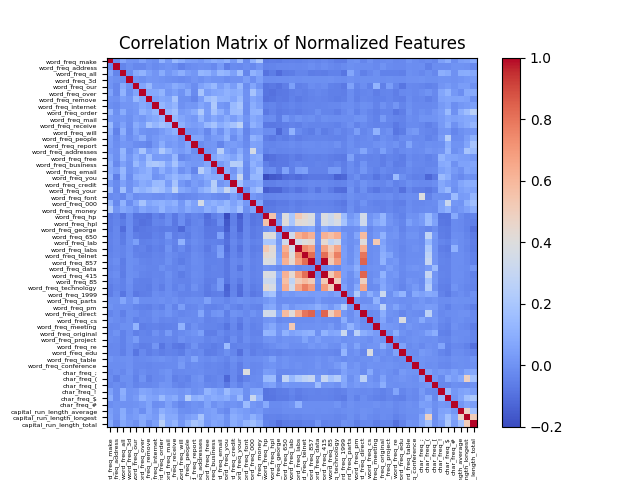

In [15]:
# Plot the correlation matrix of the normalized data
nextplot()
correlation_matrix = np.corrcoef(Xz, rowvar=False)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(D), features, rotation=90, fontsize=4.5)
plt.yticks(range(D), features, fontsize=4.5)
plt.title('Correlation Matrix of Normalized Features')
plt.show()

### Analysis of the Correlation Matrix of Normalized Data

1. **Diagonal Elements**:
   - **Observation**: The diagonal elements of the correlation matrix are all 1.
   - **Explanation**: This is expected because each feature is perfectly correlated with itself.

2. **High Positive Correlations**:
   - **Observation**: Some off-diagonal elements have high positive values (close to 1).
   - **Implication**: These features are strongly positively correlated, indicating that they tend to increase together. This might suggest that these features capture similar information or are related to similar patterns in the data.

3. **High Negative Correlations**:
   - **Observation**: Some off-diagonal elements have high negative values (close to -1).
   - **Implication**: These features are strongly negatively correlated, indicating that as one feature increases, the other tends to decrease. This might suggest that these features capture opposing trends or patterns in the data.

4. **Clusters of Correlated Features**:
   - **Observation**: There are visible clusters or blocks of features that are highly correlated with each other.
   - **Implication**: These clusters might represent groups of features that are related to specific topics or themes in the emails. For example, certain word frequency features might cluster together if they frequently appear in the same context.

5. **Weak or No Correlation**:
   - **Observation**: Many off-diagonal elements have values close to 0.
   - **Implication**: These features are weakly correlated or uncorrelated, indicating that they provide unique information and are not linearly related to each other.

#### What sticks out

1. **Strong Correlation Patterns**:
   - The presence of strong positive and negative correlations between certain features is notable. Identifying these pairs can help in understanding the relationships between different aspects of the data.

2. **Clusters of Features**:
   - The visible clusters of correlated features are interesting as they might indicate underlying patterns or themes in the dataset. These clusters can be further analyzed to understand their significance.

3. **Sparse Correlation**:
   - The fact that many features have weak or no correlation with each other is also noteworthy. This suggests that the dataset contains a diverse set of features that capture different aspects of the data.

#### What is as Expected

1. **Diagonal Elements**:
   - The diagonal elements being 1 is expected, as each feature is perfectly correlated with itself.

2. **Standardized Scale**:
   - The correlation matrix is based on the normalized data, so the scale of the features is standardized. This ensures that the correlations are not influenced by the different scales of the original features.

The correlation matrix of the normalized data provides valuable insights into the relationships between different features. The presence of strong positive and negative correlations, as well as clusters of correlated features, highlights the underlying patterns in the data. The weak or no correlation between many features suggests that the dataset contains a diverse set of features that capture different aspects of the data. These insights can be used for feature selection, dimensionality reduction, and improving the performance of machine learning models.

# 2. Maximum Likelihood Estimation

## 2 a) Show analytically that if we use a bias term, rescaling (multiply by constant) and shifting (add a constant) features leads to ML estimates with the same likelihood. Why do you think we computed z-scores then?

--> See Project Report

## Helper functions

In [16]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [17]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    return 1 / (1 + np.exp(-x))
    

In [18]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[np.float64(0.5), array([0.26894142, 0.5       , 0.73105858])]

In [19]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    return -np.log(1 + np.exp(-x))


In [20]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[np.float64(-0.6931471805599453),
 array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient: Complete the methods for computing the log-likelihood and gradient of the log-likelihood for logistic regression. We do not use a bias term throughout.

In [51]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    return np.sum(y * logsigma(X @ w) + (1 - y) * logsigma(-X @ w))


In [52]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

np.float64(-47066.641667825774)

In [53]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    return X.T @ (y - sigma(X @ w))


In [54]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

optional: rewrite loop with vectors

In [25]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

optional:

In [26]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    def objective(w):
        # YOUR CODE HERE

    def update(w, eps):
        # YOUR CODE HERE

    return (objective, update)

IndentationError: expected an indented block after function definition on line 5 (125293659.py, line 8)

In [ ]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

In [ ]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

In [ ]:
# look at how gradient descent made progess
# YOUR CODE HERE

## 2d Stochastic gradient descent

In [ ]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    # YOUR CODE HERE

In [ ]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

In [ ]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        # YOUR CODE HERE

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [ ]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

In [ ]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

## 2e Compare GD and SGD

In [ ]:
# YOUR CODE HERE

detailed description of parameter effect, maybe additionally plot for different parameter values as input -> Graph, plot results in one

# 3 Prediction

weights by features plot, maybe compare to frequency plot in the beginning

In [ ]:
def predict(Xtest, w):
    """Returns vector of predicted confidence values for logistic regression with
weight vector w."""
    # YOUR CODE HERE


def classify(Xtest, w):
    """Returns 0/1 vector of predicted class labels for logistic regression with
weight vector w."""
    # YOUR CODE HERE

In [ ]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

In [ ]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

In [ ]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

In [ ]:
# Explore which features are considered important
# YOUR CODE HERE

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [ ]:
def l_l2(y, X, w, lambda_):
    """Log-density of posterior of logistic regression with weights w and L2
regularization parameter lambda_"""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
def dl_l2(y, X, w, lambda_):
    """Gradient of log-density of posterior of logistic regression with weights w
and L2 regularization parameter lambda_."""
    # YOUR CODE HERE

In [ ]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

In [ ]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE

In [ ]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

## 4b Effect of Prior

In [ ]:
# YOUR CODE HERE

## 4c Composition of Weight Vector

In [ ]:
# YOUR CODE HERE

## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [ ]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [ ]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)